In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('C:/Users/nisha/Downloads/The-Big-List-20210117.xlsx')

In [3]:
df

,Review #,Brand,Variety,Style,Country,Stars,T
0,3702,Higashimaru,Seafood Sara Udon,Pack,Japan,5,NaN
1,3701,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,NaN
2,3700,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5,NaN
3,3699,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,NaN
4,3698,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,NaN
...,...,...,...,...,...,...,...
3697,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
3698,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
3699,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
3700,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [4]:
# rows with missing data
df.isnull().sum()

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          0
T           3702
dtype: int64

In [5]:
# No data in T column so we drop the unwanted columns
df= df.drop(['Review #','T'],axis=1)

In [6]:
df

,Brand,Variety,Style,Country,Stars
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5
...,...,...,...,...,...
3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1
3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2
3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2


In [7]:
# Dataframe column types
df.dtypes

Brand      object
Variety    object
Style      object
Country    object
Stars      object
dtype: object

In [8]:
# Stars column is object which indicates there are strings present but it should be float as only floating no. should be present
df['Stars'].value_counts()

5                      667
3.5                    543
3.75                   535
4                      439
4.5                    242
3.25                   222
4.25                   215
3                      172
2.75                   110
2                       95
4.75                    93
2.5                     93
1.5                     50
0                       40
1                       38
2.25                    29
1.75                    28
0.5                     20
0.25                    17
1.25                    14
Unrated                  3
NR                       3
4.125                    2
1.1                      2
0.75                     2
2.8                      2
2.9                      2
3.1                      2
4.25/5                   2
3.7                      1
3.4                      1
2.3                      1
3.2                      1
1.8                      1
0.1                      1
4.5/5                    1
3.6                      1
2

In [9]:
# Replacing the values
df['Stars']=df['Stars'].replace('4.5/5',4.5)
df['Stars']=df['Stars'].replace('5/2.5',2.5)
df['Stars']=df['Stars'].replace('3.5/2.5',2.5)
df['Stars']=df['Stars'].replace('4.25/5',4.25)
df['Stars'].value_counts()

5                      667
3.5                    543
3.75                   535
4                      439
4.5                    243
3.25                   222
4.25                   217
3                      172
2.75                   110
2.5                     95
2                       95
4.75                    93
1.5                     50
0                       40
1                       38
2.25                    29
1.75                    28
0.5                     20
0.25                    17
1.25                    14
Unrated                  3
NR                       3
4.125                    2
1.1                      2
3.1                      2
2.8                      2
2.9                      2
0.75                     2
NS                       1
2.125                    1
2017-04-04 00:00:00      1
2.1                      1
2017-05-05 00:00:00      1
3.65                     1
2017-05-04 00:00:00      1
0.9                      1
3.7                      1
2

In [10]:
# cleaning stars column 
df['Stars']=pd.to_numeric(df['Stars'],errors='coerce')
df['Stars'].value_counts()

5.000    667
3.500    543
3.750    535
4.000    439
4.500    243
3.250    222
4.250    217
3.000    172
2.750    110
2.000     95
2.500     95
4.750     93
1.500     50
0.000     40
1.000     38
2.250     29
1.750     28
0.500     20
0.250     17
1.250     14
1.100      2
3.100      2
2.900      2
0.750      2
2.800      2
4.125      2
2.850      1
2.300      1
3.600      1
3.700      1
3.650      1
0.100      1
3.400      1
3.125      1
1.800      1
3.200      1
2.100      1
2.125      1
0.900      1
Name: Stars, dtype: int64

In [11]:
#  checking NaN in Stars
df.isnull().sum()

Brand       0
Variety     0
Style       0
Country     0
Stars      10
dtype: int64

In [12]:
df=df.dropna()
df.isnull().sum()

Brand      0
Variety    0
Style      0
Country    0
Stars      0
dtype: int64

In [13]:
df

,Brand,Variety,Style,Country,Stars
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5
...,...,...,...,...,...
3697,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
3698,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0
3699,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0
3700,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0


In [14]:
import string
import collections
import nltk

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df=df.reset_index(drop=True)

In [17]:
# get variety column
variety=df['Variety']
variety

0                                       Seafood Sara Udon
1                     Chongqing Spicy & Sour Rice Noodles
2                    Seafood Flavour Sichuan Spicy Noodle
3                Jiangnan Style Noodle - Original Flavour
4                                      CupStar Shio Ramen
                              ...                        
3687    Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...
3688                       Oriental Style Instant Noodles
3689                                       Tom Yum Shrimp
3690                                 Tom Yum Chili Flavor
3691                                           Miso Ramen
Name: Variety, Length: 3692, dtype: object

In [18]:
variety_text="".join(variety)
variety_text

'Seafood Sara UdonChongqing Spicy & Sour Rice NoodlesSeafood Flavour Sichuan Spicy NoodleJiangnan Style Noodle - Original FlavourCupStar Shio RamenBig Boss Broad Noodle Chili Oil Flavor (Sour & Hot)Top Ramen Masala NoodlesMiyashi Chuka Cold NoodleTanukioyaji Super Spicy MazemenMichio Kawamura Nature Ramen ShioMochichi Wonton NoodleInstant Yakosoba XL Chajang (Bean Sauce) FlavorSpicy Baby Clam Flavor Cup Instant Rice NoodlesOriental Kitchen Hot Korean Instant NoodlesCoconut Chicken Curry Rice Noodle SoupShoyu FlavorKaraage Ginger Shio RamenRaoh Soy Sauce Flavor RamenSouper Bowl Noodle Pho Rice Noodle MildSekai no Yamachan Phantom Chicken Wings YakisobaArtificial Beef With SauerkrautQuick Pasta CreamyIcon Ramen Noodles Creamy Chicken GumboMi Instant Rasa VegetarianShin Red Super SpicyBuldak ChallengeDaimori Osaka KasoudonPepper SesameRed Oil Sesame PasteFragrant In Original TasteSesame PasteKiseki RamenChicken Flavor RamenHotter & Spicier RamenBeef Flavor RamenJinjja JjolmyeonTom Yum Kun

In [19]:
variety_text_lower=variety_text.lower()

In [20]:
punc_list=list(string.punctuation)

In [21]:
variety_clean="".join([char for char in variety_text_lower if char not in punc_list])

In [22]:
variety_tokens=nltk.tokenize.word_tokenize(variety_clean)
variety_tokens

['seafood',
 'sara',
 'udonchongqing',
 'spicy',
 'sour',
 'rice',
 'noodlesseafood',
 'flavour',
 'sichuan',
 'spicy',
 'noodlejiangnan',
 'style',
 'noodle',
 'original',
 'flavourcupstar',
 'shio',
 'ramenbig',
 'boss',
 'broad',
 'noodle',
 'chili',
 'oil',
 'flavor',
 'sour',
 'hottop',
 'ramen',
 'masala',
 'noodlesmiyashi',
 'chuka',
 'cold',
 'noodletanukioyaji',
 'super',
 'spicy',
 'mazemenmichio',
 'kawamura',
 'nature',
 'ramen',
 'shiomochichi',
 'wonton',
 'noodleinstant',
 'yakosoba',
 'xl',
 'chajang',
 'bean',
 'sauce',
 'flavorspicy',
 'baby',
 'clam',
 'flavor',
 'cup',
 'instant',
 'rice',
 'noodlesoriental',
 'kitchen',
 'hot',
 'korean',
 'instant',
 'noodlescoconut',
 'chicken',
 'curry',
 'rice',
 'noodle',
 'soupshoyu',
 'flavorkaraage',
 'ginger',
 'shio',
 'ramenraoh',
 'soy',
 'sauce',
 'flavor',
 'ramensouper',
 'bowl',
 'noodle',
 'pho',
 'rice',
 'noodle',
 'mildsekai',
 'no',
 'yamachan',
 'phantom',
 'chicken',
 'wings',
 'yakisobaartificial',
 'beef',


In [23]:
variety_counter=collections.Counter(variety_tokens)
variety_counter

Counter({'seafood': 85,
         'sara': 3,
         'udonchongqing': 1,
         'spicy': 296,
         'sour': 46,
         'rice': 147,
         'noodlesseafood': 4,
         'flavour': 160,
         'sichuan': 16,
         'noodlejiangnan': 1,
         'style': 118,
         'noodle': 470,
         'original': 28,
         'flavourcupstar': 1,
         'shio': 32,
         'ramenbig': 2,
         'boss': 2,
         'broad': 3,
         'chili': 39,
         'oil': 48,
         'flavor': 209,
         'hottop': 1,
         'ramen': 261,
         'masala': 12,
         'noodlesmiyashi': 1,
         'chuka': 5,
         'cold': 9,
         'noodletanukioyaji': 1,
         'super': 13,
         'mazemenmichio': 1,
         'kawamura': 3,
         'nature': 1,
         'shiomochichi': 1,
         'wonton': 8,
         'noodleinstant': 14,
         'yakosoba': 1,
         'xl': 1,
         'chajang': 3,
         'bean': 31,
         'sauce': 109,
         'flavorspicy': 6,
         'bab

In [24]:
variety_counter.most_common()

[('noodles', 615),
 ('noodle', 470),
 ('instant', 368),
 ('spicy', 296),
 ('ramen', 261),
 ('chicken', 242),
 ('with', 224),
 ('flavor', 209),
 ('beef', 190),
 ('soup', 174),
 ('flavour', 160),
 ('rice', 147),
 ('hot', 138),
 ('curry', 132),
 ('tom', 122),
 ('style', 118),
 ('sauce', 109),
 ('pork', 101),
 ('yum', 89),
 ('seafood', 85),
 ('shrimp', 82),
 ('artificial', 82),
 ('cup', 74),
 ('goreng', 72),
 ('tonkotsu', 69),
 ('sesame', 60),
 ('soy', 59),
 ('mi', 59),
 ('bowl', 53),
 ('fried', 51),
 ('oil', 48),
 ('shoyu', 48),
 ('miso', 48),
 ('sour', 46),
 ('vegetable', 43),
 ('sabor', 43),
 ('vermicelli', 42),
 ('chili', 39),
 ('black', 39),
 ('crab', 39),
 ('white', 39),
 ('kimchi', 38),
 ('pepper', 37),
 ('korean', 36),
 ('rasa', 36),
 ('a', 35),
 ('thai', 33),
 ('flavourinstant', 33),
 ('shio', 32),
 ('creamy', 32),
 ('king', 32),
 ('big', 32),
 ('new', 32),
 ('bean', 31),
 ('mein', 31),
 ('mushroom', 31),
 ('flavourcup', 29),
 ('yam', 29),
 ('original', 28),
 ('garlic', 28),
 ('to

In [25]:
is_spicy=[]
hot_flavor=["spicy","curry","hot","tom","chili","chilli","kari"
           ,"pedas","laksa"]
for variety in df['Variety'].str.lower():
    if any(flavor in variety for flavor in hot_flavor):
        is_spicy.append(1)
    else:
        is_spicy.append(0)
df['isSpicy']=is_spicy
df

,Brand,Variety,Style,Country,Stars,isSpicy
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0
...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1


In [26]:
has_chicken=[]
for variety in df['Variety'].str.lower():
    if("chicken" in variety) or ('ayam' in variety):
        has_chicken.append(1)
    else:
        has_chicken.append(0)
df['hasChicken']=has_chicken
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0
...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0


In [27]:
has_beef=[]
for variety in df['Variety'].str.lower():
    if("beef" in variety) or ('cow' in variety):
        has_beef.append(1)
    else:
        has_beef.append(0)
df['hasbeef']=has_beef
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasbeef
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0
...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0


In [28]:
df.sample(10)

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasbeef
1941,Kuriki,Mayo Ramen,Pack,Japan,4.75,0,0,0
2854,Sarimi,Soto Koya Gurih,Pack,Indonesia,4.00,0,0,0
3362,Vifon,Phu Gia Instant Bean Thread Chicken,Pack,Vietnam,3.25,0,1,0
2551,Asian Thai Foods,Joker Ready To Eat Noodles,Pack,Nepal,3.25,0,0,0
76,Myojo,Chukazanmai Soy Sauce Flavor Ramen,Pack,United States,5.00,0,0,0
977,Nissin,Premium Santouka From Hawaii Soy Sauce Ramen,Cup,Japan,3.50,0,0,0
2555,Koka,Oriental Style Instant Noodles Crab Flavour,Pack,Singapore,3.75,0,0,0
1449,Kang Shi Fu,Artificial Spicy Beef Flavour,Pack,Hong Kong,3.75,1,0,1
2270,Nissin,Pan Asian Kitchen Spicy Szechuan Chicken Flavo...,Tray,United States,3.00,1,1,0
2362,Sapporo Ichiban,Otafuku Okonomi Sauce Yakisoba,Tray,Japan,5.00,0,0,0


In [29]:
has_seafood=[]
seafood_flavor=["seafood","fish","shrimp","crab","prawn"]
for variety in df['Variety'].str.lower():
    if any(flavor in variety for flavor in seafood_flavor):
        has_seafood.append(1)
    else:
        has_seafood.append(0)
df['hasseafood']=has_seafood
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasbeef,hasseafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
brand_count=df['Brand'].value_counts()[:50]
brand_count

Nissin               476
Maruchan             131
Nongshim             119
Myojo                111
Samyang Foods        102
Paldo                 84
Mama                  71
Sapporo Ichiban       69
Indomie               56
Ottogi                50
Sau Tao               48
Acecook               48
KOKA                  39
Maggi                 38
Vifon                 36
MyKuali               35
Vina Acecook          34
Lucky Me!             34
Mamee                 34
MAMA                  33
Ve Wong               32
Master Kong           29
JML                   28
Vedan                 28
Wei Lih               28
A-Sha Dry Noodle      26
Wai Wai               26
Yum Yum               23
Wu-Mu                 23
Itsuki                20
Samyang               19
New Touch             18
Uni-President         18
Sichuan Baijia        18
Doll                  18
Koka                  18
Little Cook           17
Batchelors            16
Mr. Noodles           16
Kamfen                15


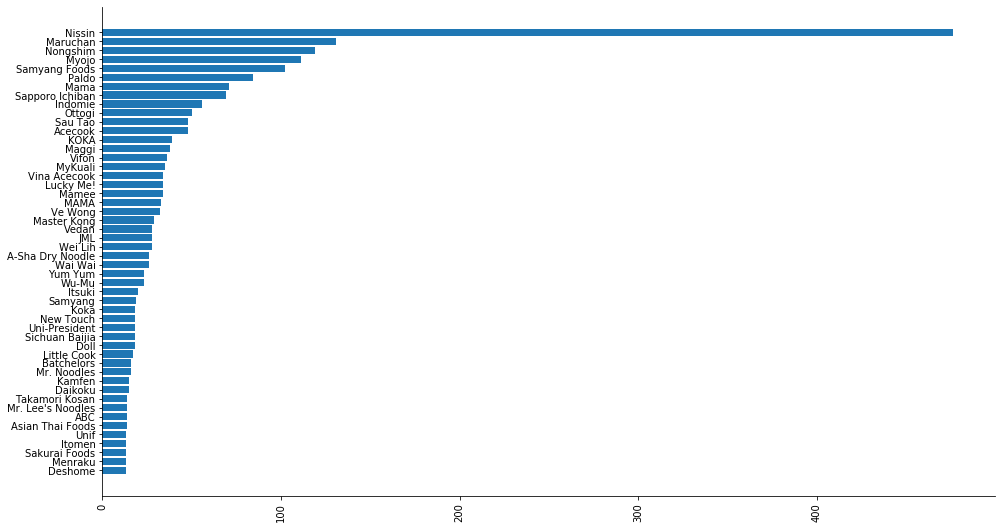

In [32]:
plt.figure(figsize=(16,9))
plt.barh(brand_count.sort_values(ascending=True).index,brand_count.sort_values(ascending=True))
plt.xticks(rotation=90)
sns.despine()

In [33]:
style_count=df['Style'].value_counts()
style_count

Pack          2085
Bowl           722
Cup            659
Tray           167
Box             54
Restaurant       3
Bar              1
Can              1
Name: Style, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

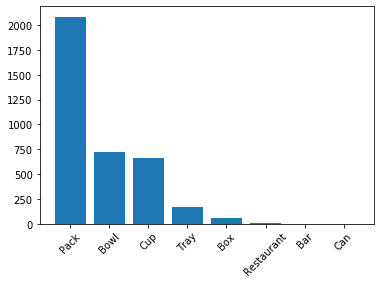

In [34]:
plt.bar(style_count.index,style_count)
plt.xticks(rotation=45)

In [35]:
country_count=df['Country'].value_counts()
country_count

Japan                 681
United States         458
South Korea           411
Taiwan                372
China                 245
Thailand              212
Malaysia              207
Hong Kong             191
Indonesia             161
Singapore             140
Vietnam               124
UK                     75
Canada                 56
Philippines            51
India                  45
Mexico                 32
Germany                28
Australia              25
Brazil                 24
Netherlands            16
Myanmar                14
Nepal                  14
Bangladesh             12
Pakistan                9
Hungary                 9
Colombia                6
France                  6
Poland                  6
Russia                  5
Sarawak                 5
Cambodia                5
Italy                   4
Fiji                    4
Peru                    4
Holland                 4
Ukraine                 3
Dubai                   3
Sweden                  3
Israel      

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 <a list of 51 Text xticklabel objects>)

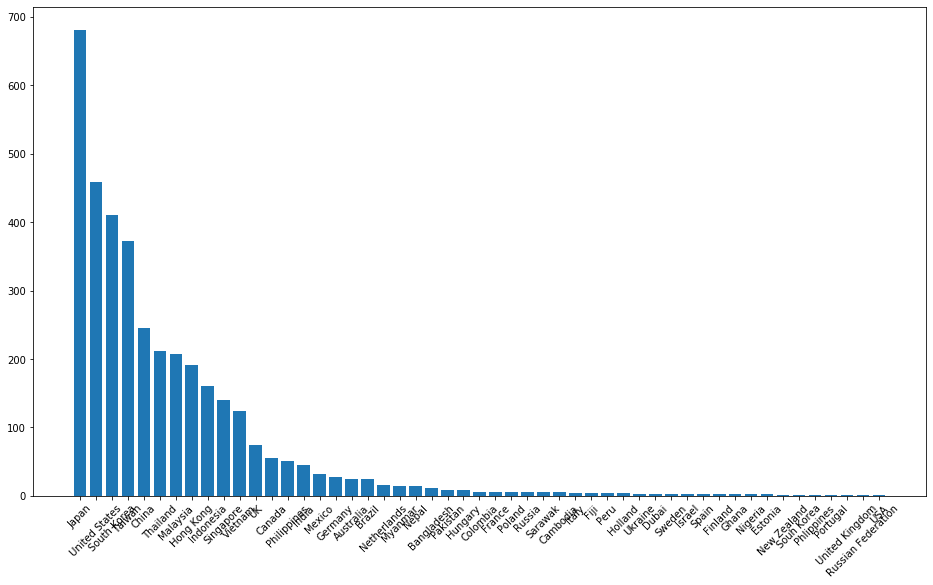

In [36]:
plt.figure(figsize=(16,9))
plt.bar(country_count.index,country_count)
plt.xticks(rotation=45)

(array([  58.,   23.,   54.,   79.,  127.,  210.,  399., 1081.,  658.,
        1003.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

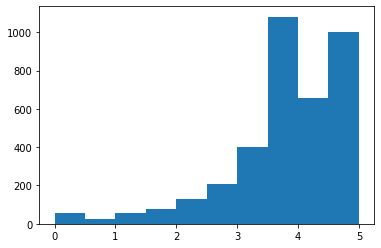

In [37]:
plt.hist(df['Stars'])

In [38]:
df['Stars'].median()

3.75

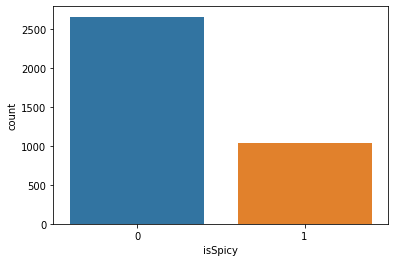

In [39]:
sns.countplot(df['isSpicy'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

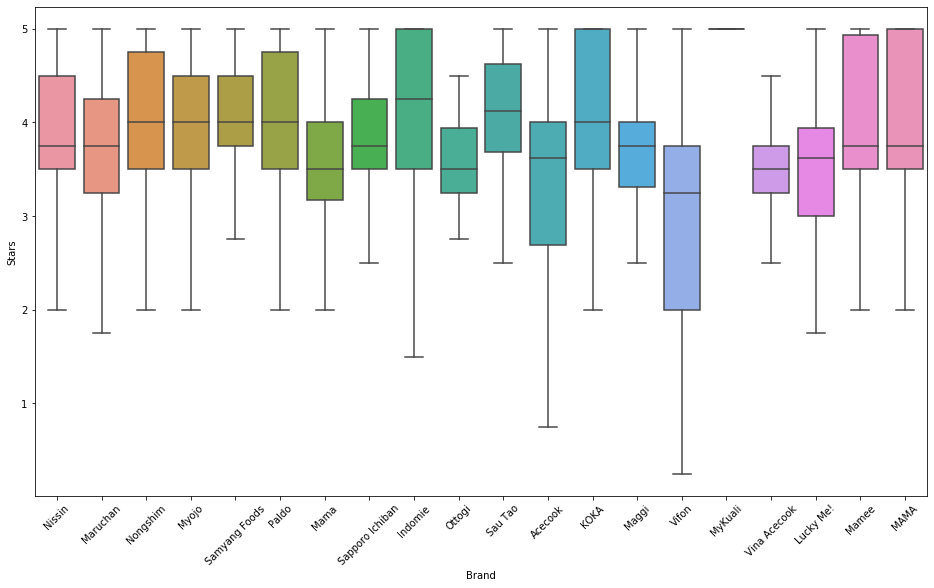

In [40]:
plt.figure(figsize=(16,9))
sns.boxplot(df['Brand'],df['Stars'],order=brand_count.index[:20],showfliers=False)
plt.xticks(rotation=45)

In [41]:
df[df['Brand']=='MyKuali']

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasbeef,hasseafood
188,MyKuali,White Fish Broth Cup Noodle,Cup,Malaysia,5.00,0,0,0,1
199,MyKuali,Penang Red Tom Yum Goong Rice Vermicelli Soup ...,Bowl,Malaysia,5.00,1,0,0,0
213,MyKuali,White Fish Broth Rice Vermicelli,Bowl,Malaysia,5.00,0,0,0,1
229,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5.00,0,0,0,1
230,MyKuali,Penang White Curry Noodle (New Recipe),Pack,Malaysia,5.00,1,0,0,0
490,MyKuali,Gaeng Som Noodle,Cup,Malaysia,4.50,0,0,0,0
942,MyKuali,Hokkien Prawn (2018 Recipe),Pack,Malaysia,5.00,0,0,0,1
951,MyKuali,Penang Red Tom Yum Goong Noodle (2018 Recipe),Pack,Malaysia,5.00,1,0,0,0
958,MyKuali,Penang White Curry Noodle (2018 Recipe),Pack,Malaysia,5.00,1,0,0,0
1020,MyKuali,Penang White Curry Noodle,Pack,Malaysia,5.00,1,0,0,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

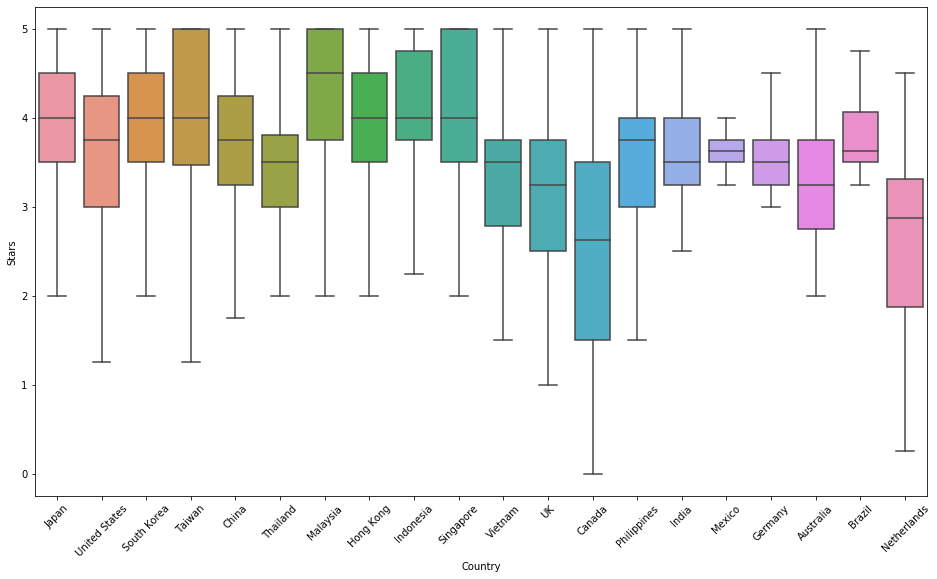

In [42]:
plt.figure(figsize=(16,9))
sns.boxplot(df['Country'],df['Stars'],order=country_count.index[:20],showfliers=False)
plt.xticks(rotation=45)

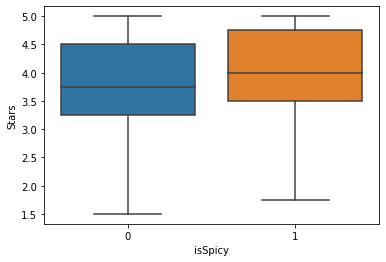

In [43]:
sns.boxplot(df['isSpicy'],df['Stars'],showfliers=False)

In [44]:
spicy_df=df[df['isSpicy']==1]
nonspicy_df=df[df['isSpicy']==0]

In [45]:
print(spicy_df['Stars'].mean())
print(nonspicy_df['Stars'].mean())

3.845135527589545
3.675112824370064


In [46]:
print(spicy_df['Stars'].median())
print(nonspicy_df['Stars'].median())

4.0
3.75


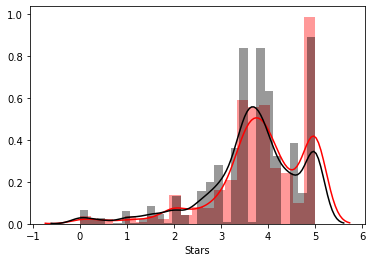

In [47]:
sns.distplot(spicy_df['Stars'],color='red')
sns.distplot(nonspicy_df['Stars'],color='black')

In [48]:
from scipy.stats import mannwhitneyu

In [49]:
mannwhitneyu(spicy_df['Stars'],nonspicy_df['Stars'])

MannwhitneyuResult(statistic=1220814.5, pvalue=6.244898720575498e-08)

In [50]:
mannwhitneyu(df[df['hasChicken']==0]['Stars'],
            df[df['hasChicken']==1]['Stars'])

MannwhitneyuResult(statistic=593212.0, pvalue=2.2524646495376065e-10)

In [51]:
mannwhitneyu(df[df['hasbeef']==0]['Stars'],
            df[df['hasbeef']==1]['Stars'])

MannwhitneyuResult(statistic=476664.5, pvalue=0.0017956542204848806)

In [52]:
mannwhitneyu(df[df['hasseafood']==0]['Stars'],
            df[df['hasseafood']==1]['Stars'])

MannwhitneyuResult(statistic=626226.5, pvalue=0.298820092010756)

In [53]:
top_thirty_brands=df['Brand'].value_counts()[:30].index
top_thirty_brands

Index(['Nissin', 'Maruchan', 'Nongshim', 'Myojo', 'Samyang Foods', 'Paldo',
       'Mama', 'Sapporo Ichiban', 'Indomie', 'Ottogi', 'Sau Tao', 'Acecook',
       'KOKA', 'Maggi', 'Vifon', 'MyKuali', 'Vina Acecook', 'Lucky Me!',
       'Mamee', 'MAMA', 'Ve Wong', 'Master Kong', 'JML', 'Vedan', 'Wei Lih',
       'A-Sha Dry Noodle', 'Wai Wai', 'Yum Yum', 'Wu-Mu', 'Itsuki'],
      dtype='object')

In [54]:
# creating new brand column
new_brand=[]
for brand in df['Brand']:
    if brand in top_thirty_brands:
        new_brand.append(brand)
    else:
        new_brand.append("Other")
df['newBrand']=new_brand
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasbeef,hasseafood,newBrand
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1,Other
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0,Other
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1,Sau Tao
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0,Sau Tao
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0,Sapporo Ichiban
...,...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0,Vifon
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0,Wai Wai
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1,Wai Wai
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0,Wai Wai


In [55]:
df['newBrand'].value_counts()

Other               1781
Nissin               476
Maruchan             131
Nongshim             119
Myojo                111
Samyang Foods        102
Paldo                 84
Mama                  71
Sapporo Ichiban       69
Indomie               56
Ottogi                50
Sau Tao               48
Acecook               48
KOKA                  39
Maggi                 38
Vifon                 36
MyKuali               35
Lucky Me!             34
Vina Acecook          34
Mamee                 34
MAMA                  33
Ve Wong               32
Master Kong           29
Wei Lih               28
Vedan                 28
JML                   28
A-Sha Dry Noodle      26
Wai Wai               26
Wu-Mu                 23
Yum Yum               23
Itsuki                20
Name: newBrand, dtype: int64

In [56]:
top_four_styles=df['Style'].value_counts().index[:4]
new_style=[]
for brand in df['Style']:
    if brand in top_four_styles:
        new_style.append(brand)
    else:
        new_style.append("Other")
df['newStyle']=new_style
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasbeef,hasseafood,newBrand,newStyle
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1,Other,Pack
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0,Other,Cup
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1,Sau Tao,Pack
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0,Sau Tao,Pack
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0,Sapporo Ichiban,Cup
...,...,...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0,Vifon,Bowl
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0,Wai Wai,Pack
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1,Wai Wai,Pack
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0,Wai Wai,Pack


In [57]:
df['newStyle'].value_counts()

Pack     2085
Bowl      722
Cup       659
Tray      167
Other      59
Name: newStyle, dtype: int64

In [58]:
top_ten_countries=df['Country'].value_counts().index[:10]
new_country=[]
for brand in df['Country']:
    if brand in top_ten_countries:
        new_country.append(brand)
    else:
        new_country.append("Other")
df['newCountry']=new_country
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasbeef,hasseafood,newBrand,newStyle,newCountry
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1,Other,Pack,Japan
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0,Other,Cup,China
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1,Sau Tao,Pack,Hong Kong
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0,Sau Tao,Pack,Hong Kong
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0,Sapporo Ichiban,Cup,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0,Vifon,Bowl,Other
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0,Wai Wai,Pack,Thailand
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1,Wai Wai,Pack,Thailand
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0,Wai Wai,Pack,Thailand


In [59]:
df['newCountry'].value_counts()

Japan            681
Other            614
United States    458
South Korea      411
Taiwan           372
China            245
Thailand         212
Malaysia         207
Hong Kong        191
Indonesia        161
Singapore        140
Name: newCountry, dtype: int64

In [60]:
brand_dummy=pd.get_dummies(df['newBrand'],drop_first=True,prefix="from")
brand_dummy

,from_Acecook,from_Indomie,from_Itsuki,from_JML,from_KOKA,from_Lucky Me!,from_MAMA,from_Maggi,from_Mama,from_Mamee,...,from_Sapporo Ichiban,from_Sau Tao,from_Ve Wong,from_Vedan,from_Vifon,from_Vina Acecook,from_Wai Wai,from_Wei Lih,from_Wu-Mu,from_Yum Yum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [61]:
style_dummy=pd.get_dummies(df['newStyle'],drop_first=True,prefix="is")
style_dummy

,is_Cup,is_Other,is_Pack,is_Tray
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
3687,0,0,0,0
3688,0,0,1,0
3689,0,0,1,0
3690,0,0,1,0


In [62]:
country_dummy=pd.get_dummies(df['newCountry'],drop_first=True,prefix="is")
country_dummy

,is_Hong Kong,is_Indonesia,is_Japan,is_Malaysia,is_Other,is_Singapore,is_South Korea,is_Taiwan,is_Thailand,is_United States
0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3687,0,0,0,0,1,0,0,0,0,0
3688,0,0,0,0,0,0,0,0,1,0
3689,0,0,0,0,0,0,0,0,1,0
3690,0,0,0,0,0,0,0,0,1,0


In [63]:
df_temp=df.drop(['Brand','Variety','Style','Country','newBrand','newStyle','newCountry'],axis=1)
df_temp

,Stars,isSpicy,hasChicken,hasbeef,hasseafood
0,5.0,0,0,0,1
1,3.5,1,0,0,0
2,5.0,1,0,0,1
3,4.5,0,0,0,0
4,3.5,0,0,0,0
...,...,...,...,...,...
3687,3.5,0,0,0,0
3688,1.0,0,0,0,0
3689,2.0,1,0,0,1
3690,2.0,1,0,0,0


In [70]:
df_final=pd.concat([df_temp,brand_dummy,style_dummy,country_dummy],axis=1)
df_final
df=df_final
df

,Stars,isSpicy,hasChicken,hasbeef,hasseafood,from_Acecook,from_Indomie,from_Itsuki,from_JML,from_KOKA,...,is_Hong Kong,is_Indonesia,is_Japan,is_Malaysia,is_Other,is_Singapore,is_South Korea,is_Taiwan,is_Thailand,is_United States
0,5.0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,3.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4.5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3.5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3688,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3689,2.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3690,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report 

In [71]:
df['binStars']=pd.qcut(df['Stars'],q=2,labels=[0,1])
df

,Stars,isSpicy,hasChicken,hasbeef,hasseafood,from_Acecook,from_Indomie,from_Itsuki,from_JML,from_KOKA,...,is_Indonesia,is_Japan,is_Malaysia,is_Other,is_Singapore,is_South Korea,is_Taiwan,is_Thailand,is_United States,binStars
0,5.0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,3.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3688,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3689,2.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3690,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [72]:
df['binStars'].value_counts()

0    2031
1    1661
Name: binStars, dtype: int64

In [75]:
x=df.drop(['binStars','Stars'],axis=1)
y=df['binStars']

In [76]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,stratify=y)

In [77]:
dummy=DummyClassifier()
dummy.fit(x_train,y_train)
dummy_pred=dummy.predict(x_test)

C:\Users\nisha\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [78]:
confusion_matrix(y_test,dummy_pred)

array([[209, 198],
       [180, 152]], dtype=int64)

In [79]:
print(classification_report(y_test,dummy_pred))

              precision    recall  f1-score   support

           0       0.54      0.51      0.53       407
           1       0.43      0.46      0.45       332

    accuracy                           0.49       739
   macro avg       0.49      0.49      0.49       739
weighted avg       0.49      0.49      0.49       739



In [80]:
logr=LogisticRegression(max_iter=1000)
logr.fit(x_train,y_train)
logr_pred=logr.predict(x_test)

In [81]:
confusion_matrix(y_test,logr_pred)

array([[263, 144],
       [123, 209]], dtype=int64)

In [82]:
print(classification_report(y_test,logr_pred))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       407
           1       0.59      0.63      0.61       332

    accuracy                           0.64       739
   macro avg       0.64      0.64      0.64       739
weighted avg       0.64      0.64      0.64       739



In [83]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree_pred=tree.predict(x_test)

In [84]:
confusion_matrix(y_test,tree_pred)

array([[271, 136],
       [140, 192]], dtype=int64)

In [85]:
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       407
           1       0.59      0.58      0.58       332

    accuracy                           0.63       739
   macro avg       0.62      0.62      0.62       739
weighted avg       0.63      0.63      0.63       739



In [86]:
forest=RandomForestClassifier()
forest.fit(x_train,y_train)
forest_pred=forest.predict(x_test)

In [88]:
confusion_matrix(y_test,forest_pred)

array([[253, 154],
       [129, 203]], dtype=int64)

In [89]:
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64       407
           1       0.57      0.61      0.59       332

    accuracy                           0.62       739
   macro avg       0.62      0.62      0.62       739
weighted avg       0.62      0.62      0.62       739



In [92]:
pd.DataFrame({'feature':x.columns,'importance':logr.coef_[0]}).sort_values('importance',ascending=False)

,feature,importance
16,from_MyKuali,1.943657
35,is_Other,1.231206
39,is_Indonesia,0.980765
19,from_Nongshim,0.774441
43,is_Singapore,0.762846
23,from_Samyang Foods,0.706544
33,from_Yum Yum,0.703494
40,is_Japan,0.700158
12,from_Mama,0.632943
41,is_Malaysia,0.603092
